In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('C:\\Users\\mooda\\OneDrive\\Desktop\\superstore_sales.csv')

In [5]:
print("Dataset Info:")
print(df.info())

print("\nFirst 5 Rows:")
print(df.head())

print("\nSummary Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64

In [7]:
print("\nMissing Values:")
print(df.isnull().sum())

df = df.dropna(subset=['Order ID', 'Customer ID', 'Product ID', 'Sales', 'Postal Code'])


Missing Values:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [9]:
print("\nDuplicate Rows:", df.duplicated().sum())

df = df.drop_duplicates()


Duplicate Rows: 0


In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y', errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y', errors='coerce')

In [13]:
categorical_cols = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']

for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip()

In [15]:
df['Sales'] = df['Sales'].astype(float)
df['Postal Code'] = df['Postal Code'].astype(int)

In [17]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]
print("\nNumber of Sales Outliers:", len(outliers))

df['Sales'] = df['Sales'].clip(lower=lower_bound, upper=upper_bound)


Number of Sales Outliers: 1141


In [19]:
for col in categorical_cols:
    print(f"\nUnique values in {col}:", df[col].unique())


Unique values in Ship Mode: ['Second Class' 'Standard Class' 'First Class' 'Same Day']

Unique values in Segment: ['Consumer' 'Corporate' 'Home Office']

Unique values in Country: ['United States']

Unique values in City: ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tam

In [21]:
df['Ship Mode'] = df['Ship Mode'].replace({
    'Second Class': 'Second Class',
    'Standard Class': 'Standard Class',
    'First Class': 'First Class',
    'Same Day': 'Same Day'
})

In [23]:
invalid_dates = df[df['Ship Date'] < df['Order Date']]
print("\nInvalid Ship Dates (Ship Date < Order Date):", len(invalid_dates))

df = df[df['Ship Date'] >= df['Order Date']]


Invalid Ship Dates (Ship Date < Order Date): 0


In [25]:
df.to_csv('superstore_sales_cleaned.csv', index=False)

print("\nCleaned dataset saved as 'superstore_sales_cleaned.csv'")


Cleaned dataset saved as 'superstore_sales_cleaned.csv'


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
print("Missing Values:")
print(df.isnull().sum())

df = df.dropna(subset=['Order ID', 'Customer ID', 'Product ID', 'Sales', 'Postal Code'])
df = df.drop_duplicates()

Missing Values:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


In [31]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y', errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y', errors='coerce')

df = df[df['Ship Date'] >= df['Order Date']]

In [33]:
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Customer Order Count'] = df.groupby('Customer ID')['Order ID'].transform('count')

df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day
df['Ship Year'] = df['Ship Date'].dt.year
df['Ship Month'] = df['Ship Date'].dt.month
df['Ship Day'] = df['Ship Date'].dt.day

In [35]:
df = df.drop(['Order Date', 'Ship Date', 'Row ID', 'Order ID', 'Customer Name', 'Product ID', 'Product Name'], axis=1)

In [37]:
categorical_cols = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']
numerical_cols = ['Postal Code', 'Order Year', 'Order Month', 'Order Day', 'Ship Year', 'Ship Month', 'Ship Day', 'Shipping Duration', 'Customer Order Count']

In [39]:
sales_median = df['Sales'].median()
df['High_Sales'] = (df['Sales'] > sales_median).astype(int)

X = df.drop(['Sales', 'High_Sales', 'Customer ID'], axis=1)
y = df['High_Sales']

In [41]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_cols)
    ])

In [43]:
X_temp, _, y_temp, _ = train_test_split(X, y, train_size=1000, stratify=y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=66, stratify=y_temp, random_state=42)

In [45]:
test_df = pd.DataFrame(X_test).copy()
test_df['High_Sales'] = y_test

class_0 = test_df[test_df['High_Sales'] == 0]
class_1 = test_df[test_df['High_Sales'] == 1]

class_0_sampled = resample(class_0, n_samples=51, random_state=42)
class_1_sampled = resample(class_1, n_samples=15, random_state=42)

test_df_balanced = pd.concat([class_0_sampled, class_1_sampled])

X_test = test_df_balanced.drop('High_Sales', axis=1)
y_test = test_df_balanced['High_Sales']

In [47]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42))
])

rf_pipeline.fit(X_train, y_train)

y_pred_rf = rf_pipeline.predict(X_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("\nRandom Forest Performance:")
print("Confusion Matrix:")
print(conf_matrix_rf)
print(f"Accuracy: {accuracy_rf:.12f}")
print("Classification Report:")
print(class_report_rf)



Random Forest Performance:
Confusion Matrix:
[[47  4]
 [ 5 10]]
Accuracy: 0.863636363636
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        51
           1       0.71      0.67      0.69        15

    accuracy                           0.86        66
   macro avg       0.81      0.79      0.80        66
weighted avg       0.86      0.86      0.86        66



C:\Users\mooda\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [49]:
svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf', C=1, epsilon=0.1))
])

svr_pipeline.fit(X_train, df.loc[X_train.index, 'Sales'])

y_pred_svr = svr_pipeline.predict(X_test)
y_pred_svr_binary = (y_pred_svr > sales_median).astype(int)

conf_matrix_svr = confusion_matrix(y_test, y_pred_svr_binary)
accuracy_svr = accuracy_score(y_test, y_pred_svr_binary)
class_report_svr = classification_report(y_test, y_pred_svr_binary)

print("\nSVR Performance:")
print("Confusion Matrix:")
print(conf_matrix_svr)
print(f"Accuracy: {accuracy_svr:.12f}")
print("Classification Report:")
print(class_report_svr)


SVR Performance:
Confusion Matrix:
[[45  6]
 [ 5 10]]
Accuracy: 0.833333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        51
           1       0.62      0.67      0.65        15

    accuracy                           0.83        66
   macro avg       0.76      0.77      0.77        66
weighted avg       0.84      0.83      0.84        66



C:\Users\mooda\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [51]:
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

knn_pipeline.fit(X_train, y_train)

y_pred_knn = knn_pipeline.predict(X_test)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

print("\nKNN Performance:")
print("Confusion Matrix:")
print(conf_matrix_knn)
print(f"Accuracy: {accuracy_knn:.12f}")
print("Classification Report:")
print(class_report_knn)


KNN Performance:
Confusion Matrix:
[[49  2]
 [ 8  7]]
Accuracy: 0.848484848485
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        51
           1       0.78      0.47      0.58        15

    accuracy                           0.85        66
   macro avg       0.82      0.71      0.75        66
weighted avg       0.84      0.85      0.83        66



C:\Users\mooda\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [53]:
X_preprocessed = preprocessor.fit_transform(X)
preprocessed_columns = numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))

df_preprocessed = pd.DataFrame(X_preprocessed, columns=preprocessed_columns)
df_preprocessed['High_Sales'] = y.reset_index(drop=True)

df_preprocessed.to_csv('superstore_sales_preprocessed_combined.csv', index=False)

print("\nPreprocessed dataset saved as 'superstore_sales_preprocessed_combined.csv'")
print("Random Forest confusion matrix saved as 'rf_confusion_matrix.png'")
print("SVR confusion matrix saved as 'svr_confusion_matrix.png'")
print("KNN confusion matrix saved as 'knn_confusion_matrix.png'")


Preprocessed dataset saved as 'superstore_sales_preprocessed_combined.csv'
Random Forest confusion matrix saved as 'rf_confusion_matrix.png'
SVR confusion matrix saved as 'svr_confusion_matrix.png'
KNN confusion matrix saved as 'knn_confusion_matrix.png'


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

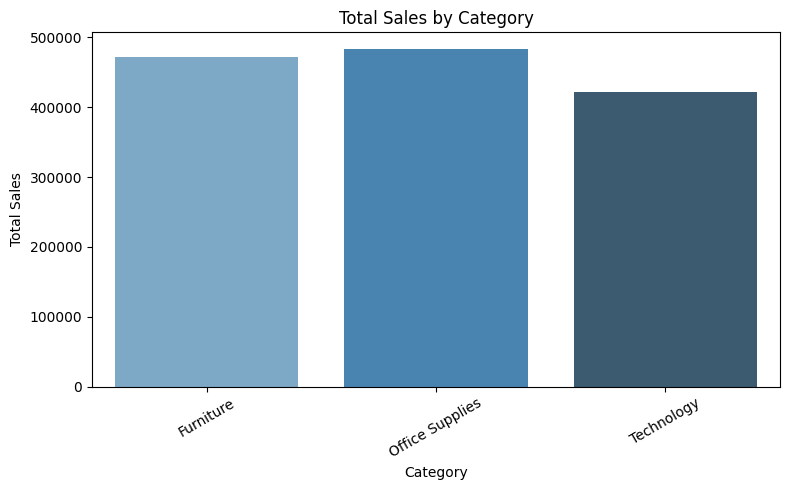

In [59]:
plt.figure(figsize=(8, 5))
sns.barplot(data=category_sales, x='Category', y='Sales', hue='Category', palette='Blues_d', legend=False)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [61]:
region_sales = df.groupby('Region')['Sales'].sum()

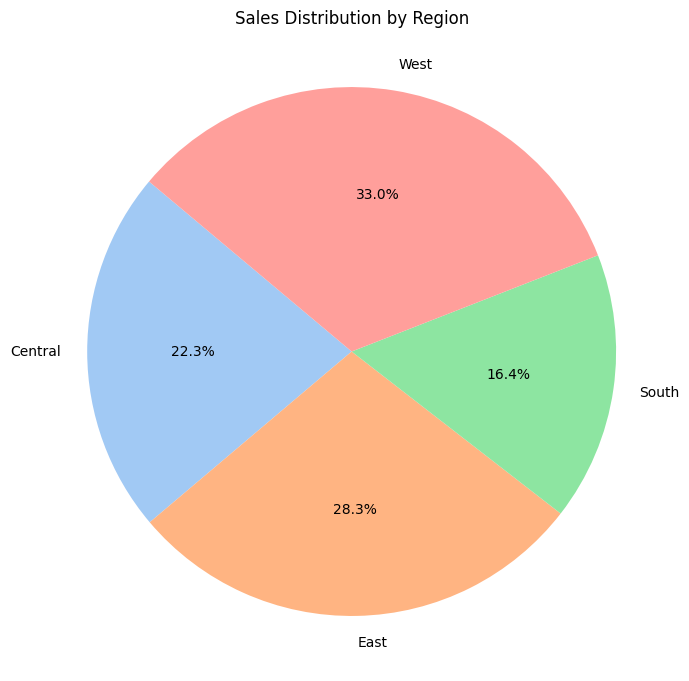

In [63]:
plt.figure(figsize=(7, 7))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Sales Distribution by Region')
plt.axis('equal')
plt.tight_layout()
plt.show()